<a href="https://colab.research.google.com/github/musfiqur552608/False-News-Detection/blob/master/NewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connection to drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/newspredict.csv',encoding='utf-8')

## Check Data(Pre Process)

In [ ]:
df.head(10)

,News,Class
0,"হ্যাঁ, আমি গোসল করি না, এটাই আমি' : গোসল না কর...",0
1,হোম টিউটর রেখে আপনার সন্তানকে যেভাবে উচ্চশিক্ষ...,0
2,হোটেলের রুমে তরুণীর সঙ্গে মারামারি করেছে বিখ্য...,0
3,হেলমেট পরেই বাইকভ্রমণের ফটোসেশন করার ৭টি অভিনব...,0
4,হুমায়ূন আহমেদের হিমু যদি মনোনয়নপত্র পূরণ করতেন,0
5,হুন্ডা চালালে কি সত্যিই বিচি নষ্ট হয় ?,0
6,হুড়োহুড়িতে বুড়ো-বুড়ি হওয়ার হুজুগে নিজেরই বিপদ...,0
7,হু হু! আমার এমপি হওয়ার সম্ভাবনা প্রবল,0
8,হিরো আলমের সাথে পাল্লা দিয়ে মনোনয়নপত্র কিনছে...,0
9,"হিরো আলম, ডিপজল ও অন্যান্য অভিনেতারা সংসদে গেল...",0


In [ ]:
df.columns

Index(['News', 'Class'], dtype='object')

In [ ]:
df.dtypes

News     object
Class     int64
dtype: object

In [ ]:
df.shape

(2348, 2)

In [ ]:
df['News'].value_counts()

বর্জ্যবাহী জাহাজ এমটি প্রডিউসারকে দেওয়া আমদানির অনুমতি বেআইনি: হাইকোর্ট                                 1
জানিয়ে দেওয়া হলো কলকাতা টেস্ট ঘিরে প্রধানমন্ত্রী শেখ হাসিনার সূচি                                       1
লক্ষ্মীপুরে নিয়মবহির্ভূতভাবে মজুত করায় ৪২ বস্তা পেঁয়াজ জব্দ                                             1
Zee বাংলা বন্ধ থাকায় লুকিয়ে পাশের বাড়ির ড্রামা দেখতে গিয়ে হাতেনাতে ধরা খেলেন এক আন্টি - Bengal Beats    1
দেশের সবচেয়ে বড় লিঙ্গ কুমিল্লার জয়নালের !                                                               1
                                                                                                       ..
‘চুমু দিয়ে নারীদের বিভিন্ন রোগ সারাতে পারেন চুমুবাবা!’                                                 1
রাজধানীতে দিনভর বৃষ্টি                                                                                  1
পারসোনা ও ফারজানা শাকিল'স থেকে মেয়াদোত্তীর্ণ আটা-ময়দা-সুজি উদ্ধার!                                     1
লাশের সারিতে স্ত্রীকে আর হাসপাতালে পেলেন মেয়েক

In [ ]:
df.isnull().sum()

News     0
Class    0
dtype: int64

In [ ]:
df.dropna()

,News,Class
0,"হ্যাঁ, আমি গোসল করি না, এটাই আমি' : গোসল না কর...",0
1,হোম টিউটর রেখে আপনার সন্তানকে যেভাবে উচ্চশিক্ষ...,0
2,হোটেলের রুমে তরুণীর সঙ্গে মারামারি করেছে বিখ্য...,0
3,হেলমেট পরেই বাইকভ্রমণের ফটোসেশন করার ৭টি অভিনব...,0
4,হুমায়ূন আহমেদের হিমু যদি মনোনয়নপত্র পূরণ করতেন,0
...,...,...
2343,মির্জাগঞ্জে ঘর চাপা পড়ে নিহত ১,1
2344,আশ্রয়কেন্দ্রে ছুটছে মানুষ,1
2345,আতঙ্কে উপকূলের মানুষ,1
2346,আজ পবিত্র ঈদে মিলাদুন্নবী (সা.),1


In [ ]:
for i in range(5):
    print("News:",i+1)
    print("Text:",df.News[i])

News: 1
Text: হ্যাঁ, আমি গোসল করি না, এটাই আমি' : গোসল না করার মোটিভেশনাল স্পিচ
News: 2
Text: হোম টিউটর রেখে আপনার সন্তানকে যেভাবে উচ্চশিক্ষিত করে তুলবেন
News: 3
Text: হোটেলের রুমে তরুণীর সঙ্গে মারামারি করেছে বিখ্যাত ফুটবলার নেইমার! ভিডিও ভাইরাল, জল্পনা তুঙ্গে -
News: 4
Text: হেলমেট পরেই বাইকভ্রমণের ফটোসেশন করার ৭টি অভিনব পদ্ধতি
News: 5
Text: হুমায়ূন আহমেদের হিমু যদি মনোনয়নপত্র পূরণ করতেন


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

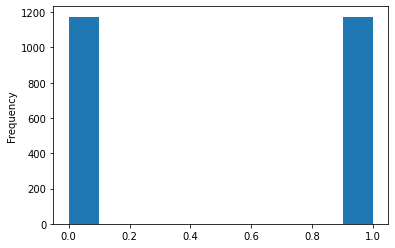

In [ ]:
df['Class'].plot(kind='hist')

In [ ]:

df['length'] = df['News'].str.split().apply(len)
df.head(10)

,News,Class,length
0,"হ্যাঁ, আমি গোসল করি না, এটাই আমি' : গোসল না কর...",0,13
1,হোম টিউটর রেখে আপনার সন্তানকে যেভাবে উচ্চশিক্ষ...,0,9
2,হোটেলের রুমে তরুণীর সঙ্গে মারামারি করেছে বিখ্য...,0,14
3,হেলমেট পরেই বাইকভ্রমণের ফটোসেশন করার ৭টি অভিনব...,0,8
4,হুমায়ূন আহমেদের হিমু যদি মনোনয়নপত্র পূরণ করতেন,0,7
5,হুন্ডা চালালে কি সত্যিই বিচি নষ্ট হয় ?,0,8
6,হুড়োহুড়িতে বুড়ো-বুড়ি হওয়ার হুজুগে নিজেরই বিপদ...,0,13
7,হু হু! আমার এমপি হওয়ার সম্ভাবনা প্রবল,0,7
8,হিরো আলমের সাথে পাল্লা দিয়ে মনোনয়নপত্র কিনছে...,0,9
9,"হিরো আলম, ডিপজল ও অন্যান্য অভিনেতারা সংসদে গেল...",0,12


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc722328910>,
      dtype=object)

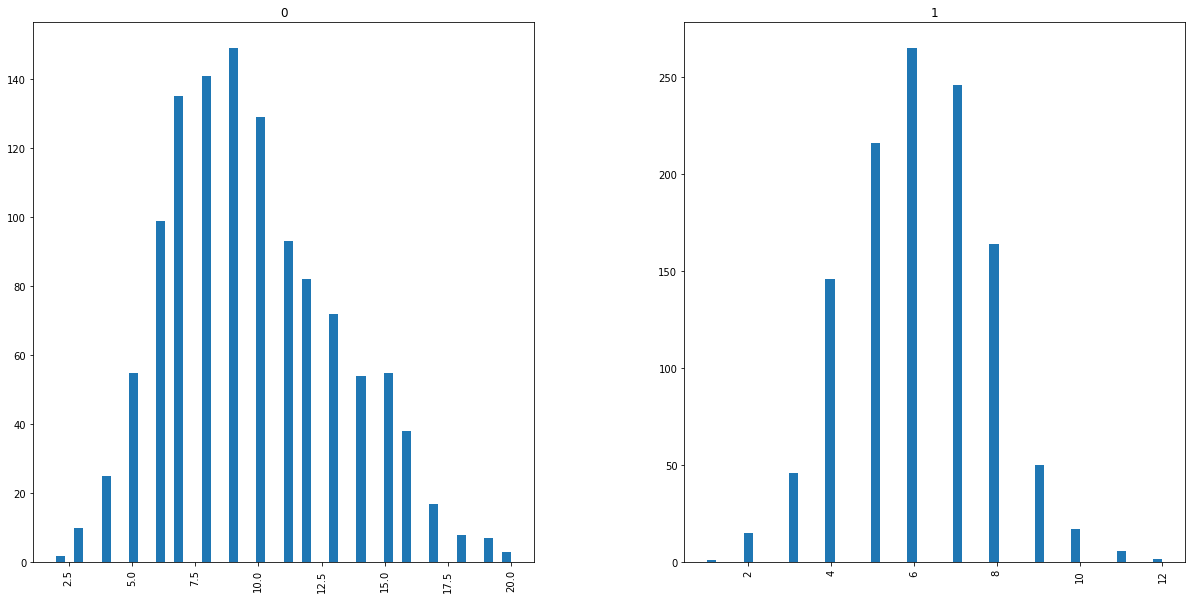

In [ ]:
df.hist(column='length', by='Class', bins=50,figsize=(20,10))

In [ ]:
df.length.describe()

count    2348.000000
mean        7.935264
std         3.224861
min         1.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        20.000000
Name: length, dtype: float64

## Punctuation Remove(Feature Selection)

In [ ]:
import string 
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [ ]:
x = df['News'].fillna(' ')
y = df['Class']
print(x.head())
print(y.head())

0    হ্যাঁ, আমি গোসল করি না, এটাই আমি' : গোসল না কর...
1    হোম টিউটর রেখে আপনার সন্তানকে যেভাবে উচ্চশিক্ষ...
2    হোটেলের রুমে তরুণীর সঙ্গে মারামারি করেছে বিখ্য...
3    হেলমেট পরেই বাইকভ্রমণের ফটোসেশন করার ৭টি অভিনব...
4       হুমায়ূন আহমেদের হিমু যদি মনোনয়নপত্র পূরণ করতেন
Name: News, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [ ]:
x = df['News'].apply(remove_punc)
x.shape

(2348,)

## Contractions

In [ ]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

## Process Sentance

In [ ]:
import re
import string
from collections import Counter
vocab = Counter()
def clean_text(x,remove_stopwords = False):
    if True:
        new_text = []
        for word in x:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        x = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    x = re.sub(bangla_digits, " ", x)
    x = re.sub(punc, " ", x)
    x = re.sub(english_chars, " ", x)
    x = re.sub(bangla_fullstop, " ", x)
    x = re.sub(punctSeq, " ", x)
    x = whitespace.sub(" ", x).strip()
    
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)
    x = re.sub(r'\<a href', ' ', x)
    x = re.sub(r'&amp;‘:‘ ’', '', x) 
    x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', x)
    x = re.sub(r'<br />', ' ', x)
    x = re.sub(r'\'', ' ', x)
    x = re.sub(r"[\@$#%~+-\.\'।\"]"," ",x)
    x = re.sub(r"(?m)^\s+", "", x)
    x = re.sub("[()]","",x)
    x = re.sub("[‘’]","",x)
    x = re.sub("[!]","",x)
    x = re.sub("[/]","",x)
    x = re.sub("[:]","",x)
    x = re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',x)
    x = x.strip("/")
    
    if remove_stopwords:
        k = []
        with open('gdrive/My Drive/Colab Notebooks/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            x = [t for t in x if t not in k]
            x = "".join(x)
   

    return x

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [ ]:
vocab = CountVectorizer(analyzer=clean_text,encoding='utf-8').fit(x)

In [ ]:

print(len(vocab.vocabulary_))

67


In [ ]:
r0 = x[0]
print(r0)

হ্যাঁ আমি গোসল করি না এটাই আমি  গোসল না করার মোটিভেশনাল স্পিচ


In [ ]:
vocab0 = vocab.transform([r0])
print(vocab0)

  (0, 0)	48
  (0, 1)	1
  (0, 5)	2
  (0, 6)	1
  (0, 11)	1
  (0, 15)	2
  (0, 17)	2
  (0, 20)	1
  (0, 25)	2
  (0, 34)	3
  (0, 35)	1
  (0, 38)	1
  (0, 39)	3
  (0, 40)	1
  (0, 41)	3
  (0, 42)	3
  (0, 43)	1
  (0, 45)	3
  (0, 46)	1
  (0, 48)	6
  (0, 49)	5
  (0, 54)	1
  (0, 56)	3
  (0, 58)	2


In [ ]:
print(vocab.get_feature_names()[50])
print(vocab.get_feature_names()[31])

ী
থ


In [ ]:
x = vocab.transform(x)

In [ ]:
print("Shape of the sparse matrix: ", x.shape)
print("Non-Zero occurences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (2348, 67)
Non-Zero occurences:  50490
Density of the matrix =  32.09463754481426


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))


Confusion Matrix for Multinomial Naive Bayes:
[[170  57]
 [ 71 172]]
Score: 72.77
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.75      0.73       227
           1       0.75      0.71      0.73       243

    accuracy                           0.73       470
   macro avg       0.73      0.73      0.73       470
weighted avg       0.73      0.73      0.73       470



In [ ]:
acc1=metrics.accuracy_score(y_test, predmnb)
print("Accuracy:",acc1*100,"%")
print("Cross Validation Score:",(cross_val_score(mnb, x, y, cv=10).mean())*100,"%")

Accuracy: 72.76595744680851 %
Cross Validation Score: 70.27241316603019 %


In [ ]:
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB()
mnb.fit(x_train.todense(),y_train)
predmnb = mnb.predict(x_test.todense())
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[138  89]
 [ 23 220]]
Score: 76.17
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.61      0.71       227
           1       0.71      0.91      0.80       243

    accuracy                           0.76       470
   macro avg       0.78      0.76      0.75       470
weighted avg       0.78      0.76      0.76       470



In [ ]:
acc1=metrics.accuracy_score(y_test, predmnb)
print("Accuracy:",acc1*100,"%")
print("Cross Validation Score:",(cross_val_score(mnb, x, y, cv=10).mean())*100,"%")

Accuracy: 76.17021276595744 %
Cross Validation Score: nan %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

  FitFailedWarning)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[181  46]
 [ 38 205]]
Score: 82.13
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.80      0.81       227
           1       0.82      0.84      0.83       243

    accuracy                           0.82       470
   macro avg       0.82      0.82      0.82       470
weighted avg       0.82      0.82      0.82       470



In [ ]:
acc2=metrics.accuracy_score(y_test,predrmfr)
print("Accuracy:",acc2*100,"%")
print("Cross Validation Score:",(cross_val_score(rmfr, x, y, cv=10).mean())*100,"%")

Accuracy: 82.12765957446808 %
Cross Validation Score: 79.59883615202764 %


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[176  51]
 [ 75 168]]
Score: 73.19
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.78      0.74       227
           1       0.77      0.69      0.73       243

    accuracy                           0.73       470
   macro avg       0.73      0.73      0.73       470
weighted avg       0.74      0.73      0.73       470



In [ ]:
acc3=metrics.accuracy_score(y_test,preddt)
print("Accuracy:",acc3*100,"%")
print("Cross Validation Score:",(cross_val_score(dt, x, y, cv=10).mean())*100,"%")

Accuracy: 73.19148936170212 %
Cross Validation Score: 72.23149663575195 %


## SVC

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[166  61]
 [ 41 202]]
Score: 78.3
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.73      0.76       227
           1       0.77      0.83      0.80       243

    accuracy                           0.78       470
   macro avg       0.78      0.78      0.78       470
weighted avg       0.78      0.78      0.78       470



In [ ]:
acc4=metrics.accuracy_score(y_test,predsvm)
print("Accuracy:",acc4*100,"%")
print("Cross Validation Score:",(cross_val_score(svm, x, y, cv=10).mean())*100,"%")

Accuracy: 78.29787234042553 %
Cross Validation Score: 75.7239498090562 %


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[161  66]
 [ 71 172]]
Score:  70.85
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       227
           1       0.72      0.71      0.72       243

    accuracy                           0.71       470
   macro avg       0.71      0.71      0.71       470
weighted avg       0.71      0.71      0.71       470



In [ ]:
acc5=metrics.accuracy_score(y_test,predknn)
print("Accuracy:",acc5*100,"%")
print("Cross Validation Score:",(cross_val_score(knn, x, y, cv=10).mean())*100,"%")

Accuracy: 70.85106382978724 %
Cross Validation Score: 70.91198399709037 %


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for xgboost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for xgboost Classifier:
[[175  52]
 [ 30 213]]
Score:  82.55
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       227
           1       0.80      0.88      0.84       243

    accuracy                           0.83       470
   macro avg       0.83      0.82      0.82       470
weighted avg       0.83      0.83      0.82       470



In [ ]:
acc6=metrics.accuracy_score(y_test,predxgb)
print("Accuracy:",acc6*100,"%")
cross_val_score(xgb, x, y, cv=10)
xgb_cross_val=cross_val_score(xgb, x, y, cv=10).mean()
xgb_cross_val

Accuracy: 82.5531914893617 %


0.795982905982906

## Prediction Checking

In [ ]:
headline=input()
prt=vocab.transform([headline])

In [ ]:
m1=svm.predict(prt)
print("Predicted Rating:",m1)
if m1==0:
  print("False News")
else:
  print("True News")

Predicted Rating: [0]
False News


In [ ]:
m2=knn.predict(prt)
print("Predicted Rating:",m2)
if m2==0:
  print("False News")
else: 
  print("True News")

Predicted Rating: [0]
False News


In [ ]:
m3=dt.predict(prt)
print("Predicted Rating:",m3)
if m3==0:
  print("False News")
else: 
  print("True News")

Predicted Rating: [0]
False News


In [ ]:
m4=mnb.predict(prt)
print("Predicted Rating:",m4)
if m4==0:
  print("False News")
else: 
  print("True News")

Predicted Rating: [0]
False News


In [ ]:
m5=rmfr.predict(prt)
print("Predicted Rating:",m5)
if m5==0:
  print("False News")
else: 
  print("True News")

Predicted Rating: [0]
False News


## Data Representation

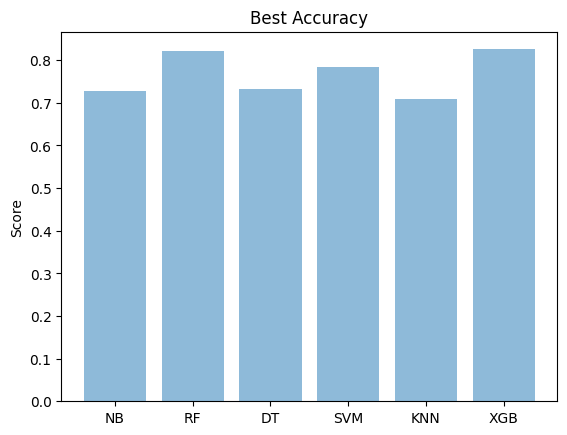

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('NB','RF','DT','SVM','KNN','XGB')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')

plt.show()